# CIFAR-10图像分类 CIFAR-10 Image Classification

## 背景 Background

相较于MNIST，CIFAR 数据集确实更复杂，但它仍然是深度学习研究中的常用基准数据集之一，我们要做的就是对图像进行分类，让神经网络能够区分它们。以下是对 CIFAR 数据集和其他被广泛使用的“正规”数据集的简要说明：
  
Compared to MNIST, the CIFAR dataset is indeed more complex, but it remains one of the commonly used benchmark datasets in deep learning research. Our task is to classify the images so that the neural network can distinguish them. Here is a brief overview of the CIFAR dataset and other widely used "standard" datasets:

CIFAR 数据集
 - CIFAR-10:
  - 包含 10 个类别的彩色图像，每个类别有 6000 张图像，总共 60000 张大小为 32x32 的图像。
  - 它比MNIST更具挑战性，因为它包含了彩色图像，且物体的形状、角度、背景等都有较大的变化。
  - 典型表现：现代神经网络（例如ResNet、DenseNet）在CIFAR-10上可以达到 95-99% 的准确度，但仍然远未达到100%。
 - CIFAR-100:
  - 与CIFAR-10类似，但包含 100 个类别，每个类别有 600 张图像。
  - 这使得分类任务更具挑战性，因为类别数量更多，类别之间的差异可能更细微。
  - 典型表现：现代深度学习模型在CIFAR-100上的表现通常在 70-90% 左右，具体取决于模型的复杂度和训练方法。
  

CIFAR Dataset
 - CIFAR-10:
  - Contains 10 categories of color images, with 6,000 images per category, totaling 60,000 images sized at 32x32 pixels.
  - It is more challenging than MNIST because it includes color images, and there are significant variations in   - object shapes, angles, backgrounds, etc.
  - Typical Performance: Modern neural networks (such as ResNet and DenseNet) can achieve 95-99% accuracy on CIFAR-10, but still fall short of 100%.

 - CIFAR-100:
  - Similar to CIFAR-10, but contains 100 categories, each with 600 images.
  - This makes the classification task more challenging due to the larger number of categories, with potentially subtler differences between them.
  - Typical Performance: Modern deep learning models typically achieve around 70-90% accuracy on CIFAR-100, depending on the model's complexity and training methods.

我们本次使用CIFAR-10进行测试

This time we use CIFAR-10 for tests

In [9]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# 定义CIFAR-10的类别名称
# Define CIFAR-10 class names
cifar10_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# 定义一个函数来加载单个文件
# Define a function to load a single batch file
def load_cifar_batch(file):
    """从CIFAR-10的单个batch文件中加载数据
    Load data from a single batch file of CIFAR-10"""
    
    # 使用pickle从文件中加载字典
    # Use pickle to load the dictionary from the file
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
        
        # 读取图像数据和标签
        # Read image data and labels
        X = data_dict[b'data']
        Y = data_dict[b'labels']
        
        # CIFAR-10的每个样本是32x32的彩色图像，所以将数据重塑为(N, 3, 32, 32)
        # Each sample in CIFAR-10 is a 32x32 color image, so reshape the data to (N, 3, 32, 32)
        X = X.reshape(-1, 3, 32, 32).astype(np.float32)
        
        # 将标签转换为numpy数组
        # Convert labels to numpy array
        Y = np.array(Y)
    
    return X, Y

# 加载训练集数据
# Load training data
def load_cifar10_train(data_dir):
    """加载CIFAR-10所有训练集数据
    Load all CIFAR-10 training data"""
    
    # 初始化列表存储所有训练数据和标签
    # Initialize lists to store all training data and labels
    train_data = []
    train_labels = []
    
    # CIFAR-10有5个训练批次
    # CIFAR-10 has 5 training batches
    for i in range(1, 6):
        file = os.path.join(data_dir, f'data_batch_{i}')
        
        # 加载每个批次的数据和标签
        # Load data and labels for each batch
        X, Y = load_cifar_batch(file)
        
        # 将数据和标签添加到各自的列表中
        # Append the data and labels to their respective lists
        train_data.append(X)
        train_labels.append(Y)
    
    # 将所有batch的数据堆叠起来
    # Concatenate all batch data together
    train_data = np.concatenate(train_data)
    train_labels = np.concatenate(train_labels)
    
    return train_data, train_labels

# 加载测试集数据
# Load test data
def load_cifar10_test(data_dir):
    """加载CIFAR-10测试集数据
    Load CIFAR-10 test data"""
    
    # 测试集数据在单独的batch文件中
    # Test data is in a separate batch file
    file = os.path.join(data_dir, 'test_batch')
    
    # 加载测试数据和标签
    # Load test data and labels
    test_data, test_labels = load_cifar_batch(file)
    
    return test_data, test_labels

# 随机抽取一张图片并展示
# Randomly select and display an image
def show_random_image(data, labels):
    """从数据集中随机选取一张图片并展示
    Randomly select and display an image from the dataset"""
    
    # 随机选取一个索引
    # Randomly select an index
    index = random.randint(0, len(data) - 1)
    
    # 获取对应的图像和标签
    # Get the corresponding image and label
    img = data[index]
    label = labels[index]
    
    # 将图像从 (3, 32, 32) 转换为 (32, 32, 3) 以便使用matplotlib展示
    # Convert image from (3, 32, 32) to (32, 32, 3) for displaying with matplotlib
    img = np.transpose(img, (1, 2, 0))
    
    # 展示图像
    # Display the image
    plt.imshow(img / 255.0)  # 将像素值归一化到 [0, 1] 区间 / Normalize pixel values to [0, 1]
    plt.title(f"Label: {cifar10_labels[label]} ({label})")  # 显示标签 / Show label
    plt.axis('off')  # 去除坐标轴 / Remove axis
    plt.show()

Training data size: (50000, 3, 32, 32), Training labels size: (50000,)
Test data size: (10000, 3, 32, 32), Test labels size: (10000,)
Training data shape: (50000, 3, 32, 32)
Test data shape: (10000, 3, 32, 32)
Training data min: 0.0, max: 255.0
Test data min: 0.0, max: 255.0


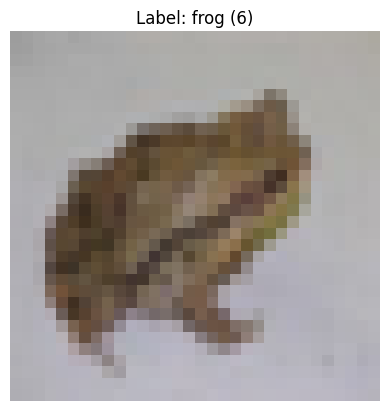

In [11]:
# CIFAR-10数据文件解压到 'cifar-10-batches-py/' 目录
# CIFAR-10 data files are extracted in the 'cifar-10-batches-py/' directory
data_dir = './cifar-10-batches-py/'

# 加载训练和测试数据
# Load training and test data
train_data, train_labels = load_cifar10_train(data_dir)
test_data, test_labels = load_cifar10_test(data_dir)

# 打印训练集和测试集的大小
# Print the size of training and test data
print(f"Training data size: {train_data.shape}, Training labels size: {train_labels.shape}")
print(f"Test data size: {test_data.shape}, Test labels size: {test_labels.shape}")

# 打印训练和测试数据的形状
# Print the shape of training and test data
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# 计算并打印训练数据和测试数据的最小值和最大值
# Calculate and print the min and max values of the training and test data
train_min, train_max = train_data.min(), train_data.max()
test_min, test_max = test_data.min(), test_data.max()

print(f"Training data min: {train_min}, max: {train_max}")
print(f"Test data min: {test_min}, max: {test_max}")

# 展示一张随机的训练集图片
# Display a random training image
show_random_image(train_data, train_labels)

In [15]:
x_train, y_train = load_cifar10_train(data_dir)
x_test, y_test = load_cifar10_test(data_dir)

## 神经网络识别 Neural networks for recognition

### 一层隐藏层 One hidden layer

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2719 - loss: 2.0026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3612 - loss: 1.7913
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3795 - loss: 1.7368
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3884 - loss: 1.7229
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3992 - loss: 1.6919
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3970 - loss: 1.6843
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4100 - loss: 1.6675
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4118 - loss: 1.6629
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4128 - loss: 1.6480
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4200 - loss: 1.6388
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4051 - loss: 1.6508
Test accuracy: 40.67%
313/313 ━━━━━━━━━━━━━━

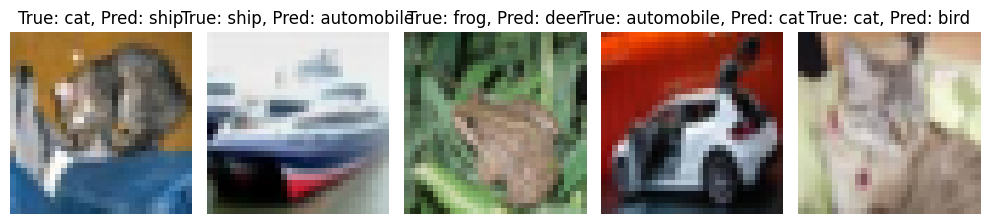

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据预处理：将图像展平为3*32*32维向量，并将像素值归一化到[0, 1]
# 1. Data Preprocessing: Flatten the images into 3*32*32-dimensional vectors 
#    and normalize the pixel values to the range [0, 1].
x_train_p = x_train.reshape(-1, 3*32*32).astype('float32') / 255.0
x_test_p = x_test.reshape(-1, 3*32*32).astype('float32') / 255.0

# 2. 构建简单的神经网络模型
# 2. Build a simple neural network model
model = models.Sequential([
    # 输入层，3*32*32像素展平为3*32*32个输入
    # Input layer: 3*32*32 pixels flattened into 3*32*32 inputs
    layers.InputLayer(input_shape=(3*32*32,)),  
    # 隐藏层，64个神经元，激活函数为ReLU
    # Hidden layer: 64 neurons, ReLU activation
    layers.Dense(64, activation='relu'),    
    # 输出层，10个类别，使用Softmax激活
    # Output layer: 10 classes, Softmax activation
    layers.Dense(10, activation='softmax')    
])

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 训练模型
# 4. Train the model
model.fit(x_train_p, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_p, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_p)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    img = np.transpose(x_test[idx], (1, 2, 0))
    plt.imshow(img / 255.0)  # 将像素值归一化到 [0, 1] 区间 / Normalize pixel values to [0, 1]
    plt.title(f"True: {cifar10_labels[y_test[idx]]}, Pred: {cifar10_labels[predicted_labels[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 多层隐藏层 Multiple hidden layers

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2627 - loss: 2.0001
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3744 - loss: 1.7418
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3990 - loss: 1.6650
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4193 - loss: 1.6168
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4272 - loss: 1.5870
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4368 - loss: 1.5680
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4419 - loss: 1.5470
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4505 - loss: 1.5317
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4552 - loss: 1.5231
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4524 - loss: 1.5240
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4593 - loss: 1.5336
Test accuracy: 45.42%
313/313 ━━━━━━━━━━━━━━

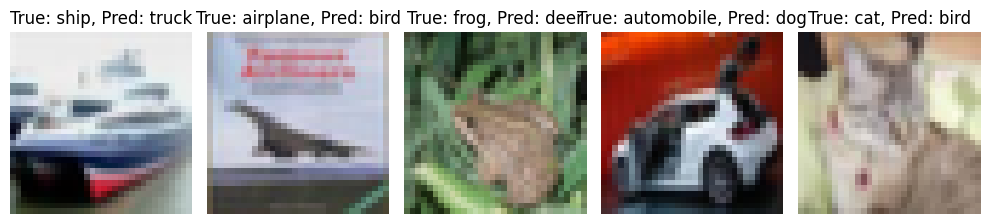

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据预处理：将图像展平为3*32*32维向量，并将像素值归一化到[0, 1]
# 1. Data Preprocessing: Flatten the images into 3*32*32-dimensional vectors 
#    and normalize the pixel values to the range [0, 1].
x_train_p = x_train.reshape(-1, 3*32*32).astype('float32') / 255.0
x_test_p = x_test.reshape(-1, 3*32*32).astype('float32') / 255.0

# 2. 构建简单的神经网络模型
# 2. Build a simple neural network model
model = models.Sequential([
    # 输入层，3*32*32像素展平为3*32*32个输入
    # Input layer: 3*32*32 pixels flattened into 3*32*32 inputs
    layers.InputLayer(input_shape=(3*32*32,)),  
    # 多层隐藏层，64个神经元，激活函数为ReLU
    # Multiple hidden layer2: 64 neurons, ReLU activation
    layers.Dense(64, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),  
    # 输出层，10个类别，使用Softmax激活
    # Output layer: 10 classes, Softmax activation
    layers.Dense(10, activation='softmax')    
])

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 训练模型
# 4. Train the model
model.fit(x_train_p, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_p, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_p)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    img = np.transpose(x_test[idx], (1, 2, 0))
    plt.imshow(img / 255.0)  # 将像素值归一化到 [0, 1] 区间 / Normalize pixel values to [0, 1]
    plt.title(f"True: {cifar10_labels[y_test[idx]]}, Pred: {cifar10_labels[predicted_labels[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 卷积神经网络识别 Convolutional neural networks for recognition

### 一层卷积层 One convolutional layer

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.3939 - loss: 1.7117
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.5629 - loss: 1.2576
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6089 - loss: 1.1266
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6338 - loss: 1.0485
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6568 - loss: 0.9833
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6771 - loss: 0.9387
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6927 - loss: 0.8867
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.7162 - loss: 0.8280
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7264 - loss: 0.7907
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7456 - loss: 0.7337
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6044 - loss: 1.2039
Test accuracy: 60.45%
3

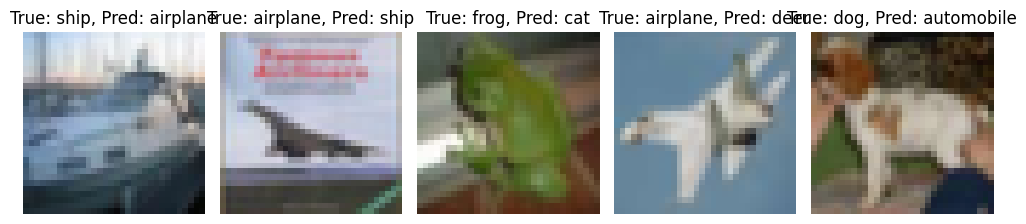

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据预处理：将图像展平为3*32*32维向量，并将像素值归一化到[0, 1]
# 1. Data Preprocessing: Flatten the images into 3*32*32-dimensional vectors 
#    and normalize the pixel values to the range [0, 1].
x_train_cnn = x_train.reshape(-1, 32, 32, 3).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 32, 32, 3).astype('float32') / 255.0

# 2. 构建卷积的神经网络模型
# 2. Build a simple convolutional neural network model
model = models.Sequential([
    # 第一层卷积层，32个3x3滤波器，激活函数为ReLU
    # First convolutional layer: 32 filters of size 3x3, activation function is ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # 最大池化层
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),  
    # 展平层
    # Flatten layer
    layers.Flatten(),
    # 全连接层，128个神经元
    # Fully connected layer: 64 neurons
    layers.Dense(128, activation='relu'),
    # 输出层，10个类别
    # Output layer: 10 classes
    layers.Dense(10, activation='softmax')
])

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 训练模型
# 4. Train the model
model.fit(x_train_cnn, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    img = np.transpose(x_test[idx], (1, 2, 0))
    plt.imshow(img / 255.0)  # 将像素值归一化到 [0, 1] 区间 / Normalize pixel values to [0, 1]
    plt.title(f"True: {cifar10_labels[y_test[idx]]}, Pred: {cifar10_labels[predicted_labels[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 多层卷积层 Multiple convolutional layer

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 118ms/step - accuracy: 0.3622 - loss: 1.7473
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 118ms/step - accuracy: 0.5476 - loss: 1.2781
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.6021 - loss: 1.1267
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 133ms/step - accuracy: 0.6449 - loss: 1.0133
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 216s 138ms/step - accuracy: 0.6735 - loss: 0.9344
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 211s 135ms/step - accuracy: 0.6929 - loss: 0.8664
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 226s 145ms/step - accuracy: 0.7174 - loss: 0.7971
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 279s 179ms/step - accuracy: 0.7429 - loss: 0.7401
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 342s 218ms/step - accuracy: 0.7580 - loss: 0.6809
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 338s 216ms/step - accuracy: 0.7802 - loss: 0.6285
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.6251 - loss: 1.1915
Te

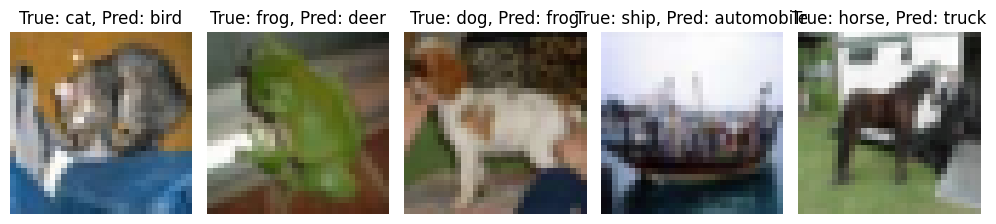

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据预处理：将图像展平为3*32*32维向量，并将像素值归一化到[0, 1]
# 1. Data Preprocessing: Flatten the images into 3*32*32-dimensional vectors 
#    and normalize the pixel values to the range [0, 1].
x_train_cnn = x_train.reshape(-1, 32, 32, 3).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 32, 32, 3).astype('float32') / 255.0

# 2. 构建卷积的神经网络模型
# 2. Build a simple convolutional neural network model
model = models.Sequential([
    # 第一层卷积层，256个3x3滤波器，激活函数为ReLU
    # First convolutional layer: 32 filters of size 3x3, activation function is ReLU
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # 最大池化层
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),  
    # 第二层卷积层，256个3x3滤波器
    # Second convolutional layer: 64 filters of size 3x3
    layers.Conv2D(256, (3, 3), activation='relu'),
    # 最大池化层
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),
    # 展平层
    # Flatten layer
    layers.Flatten(),
    # 全连接层，64个神经元
    # Fully connected layer: 64 neurons
    layers.Dense(256, activation='relu'),
    # 输出层，10个类别
    # Output layer: 10 classes
    layers.Dense(10, activation='softmax')
])

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 4. 训练模型
# 4. Train the model
model.fit(x_train_cnn, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    img = np.transpose(x_test[idx], (1, 2, 0))
    plt.imshow(img / 255.0)  # 将像素值归一化到 [0, 1] 区间 / Normalize pixel values to [0, 1]
    plt.title(f"True: {cifar10_labels[y_test[idx]]}, Pred: {cifar10_labels[predicted_labels[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 深层卷积神经网络与残差网络 Deep Convolutional Neural Networks and Residual Networks

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.2972 - loss: 1.9003
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4864 - loss: 1.4183
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5530 - loss: 1.2440
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6013 - loss: 1.1226
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6335 - loss: 1.0403
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6584 - loss: 0.9632
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6845 - loss: 0.8909
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.6991 - loss: 0.8477
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7188 - loss: 0.7859
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7414 - loss: 0.7273
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6142 - loss: 1.1880
Test accuracy: 61.09%
3

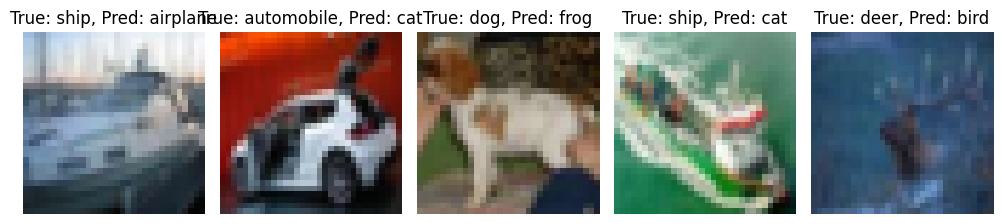

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据预处理：将图像展平为3*32*32维向量，并将像素值归一化到[0, 1]
# 1. Data Preprocessing: Flatten the images into 3*32*32-dimensional vectors 
#    and normalize the pixel values to the range [0, 1].
x_train_cnn = x_train.reshape(-1, 32, 32, 3).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 32, 32, 3).astype('float32') / 255.0

# 定义残差块
# Define a Residual Block
def residual_block(x, filters, kernel_size=(3, 3)):
    # 保存输入以便后面进行跳跃连接
    # Save the input for the skip connection
    shortcut = x
    # 第一层卷积
    # First convolution layer
    x = layers.Conv2D(filters, kernel_size, padding='same', activation='relu')(x)
    # 第二层卷积
    # Second convolution layer
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    # 跳跃连接：将输入与卷积层输出相加
    # Skip connection: Add input (shortcut) to output of convolution layers
    x = layers.Add()([x, shortcut])
    # 激活函数 ReLU
    # Activation function ReLU
    x = layers.Activation('relu')(x)
    return x

# 2. 使用Functional API构建模型
# 2. Build the model using Functional API
# 输入层
# Input layer
inputs = layers.Input(shape=(32, 32, 3))
# 第一层卷积层和池化层
# First convolutional layer and pooling layer
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
# 添加第一个残差块
# Add first residual block
x = residual_block(x, 32)
# 第二层卷积层和池化层
# Second convolutional layer and pooling layer
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# 添加第二个残差块
# Add second residual block
x = residual_block(x, 64)
# 第三层卷积层和池化层
# Third convolutional layer and pooling layer
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# 展平层
# Flatten layer
x = layers.Flatten()(x)
# 全连接层
# Fully connected layer
x = layers.Dense(128, activation='relu')(x)
# 输出层
# Output layer
outputs = layers.Dense(10, activation='softmax')(x)
# 构建模型
# Build the model
model = models.Model(inputs=inputs, outputs=outputs)

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 训练模型
# 4. Train the model
model.fit(x_train_cnn, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    img = np.transpose(x_test[idx], (1, 2, 0))
    plt.imshow(img / 255.0)  # 将像素值归一化到 [0, 1] 区间 / Normalize pixel values to [0, 1]
    plt.title(f"True: {cifar10_labels[y_test[idx]]}, Pred: {cifar10_labels[predicted_labels[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()